<a href="https://colab.research.google.com/github/Maitreebapna/loan_sanction_project/blob/main/Copy_of_loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Libraries

In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

In [ ]:
!pip install seaborn

Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [ ]:
#loading the dataset to pandas Dataframe
loan_dataset = pd.read_excel('/content/loan.csv.xlsx')

In [ ]:
print(type(loan_dataset))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# printing the first 10 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


In [ ]:
# number of rows and columns
loan_dataset.shape

(149, 13)

In [ ]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,149.000000,149.000000,140.000000,143.000000,137.000000
mean,4856.315436,1666.201342,141.500000,341.538462,0.854015
std,3498.015385,1957.319026,78.204077,64.177436,0.354387
min,1000.000000,0.000000,17.000000,60.000000,0.000000
25%,2957.000000,0.000000,99.000000,360.000000,1.000000
50%,3800.000000,1459.000000,125.000000,360.000000,1.000000
75%,5417.000000,2358.000000,172.750000,360.000000,1.000000
max,23803.000000,10968.000000,650.000000,480.000000,1.000000


In [ ]:
pd.crosstab(loan_dataset['Credit_History'], loan_dataset ['Loan_Status'], margins=True)

Loan_Status,0,1,All
Credit_History,,,
0.0,14,1,15
1.0,23,76,99
All,37,77,114


<Axes: >

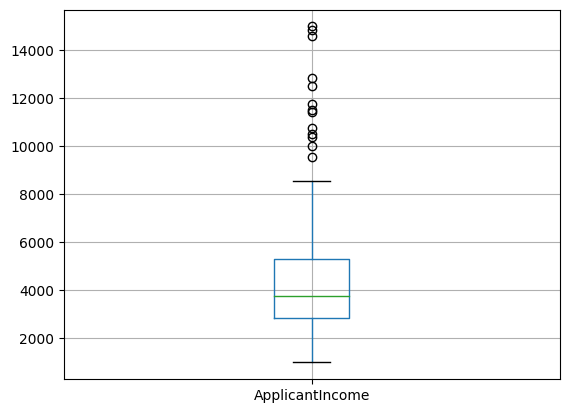

In [ ]:
loan_dataset.boxplot(column='ApplicantIncome')

<Axes: >

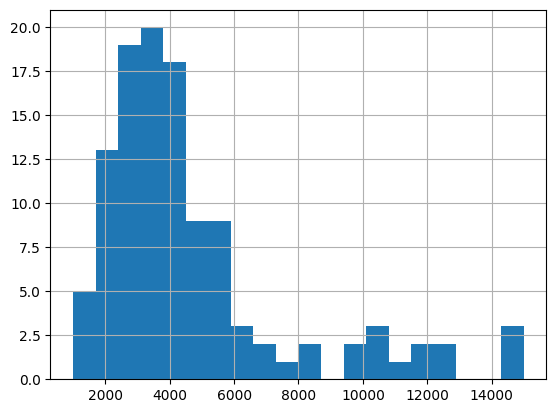

In [ ]:
loan_dataset['ApplicantIncome'].hist(bins=20)

<Axes: >

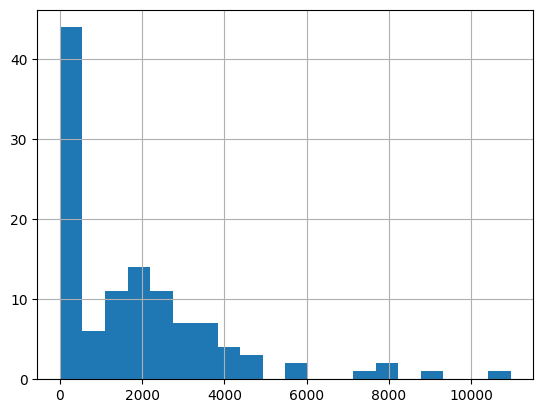

In [ ]:
loan_dataset ['CoapplicantIncome'].hist(bins=20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

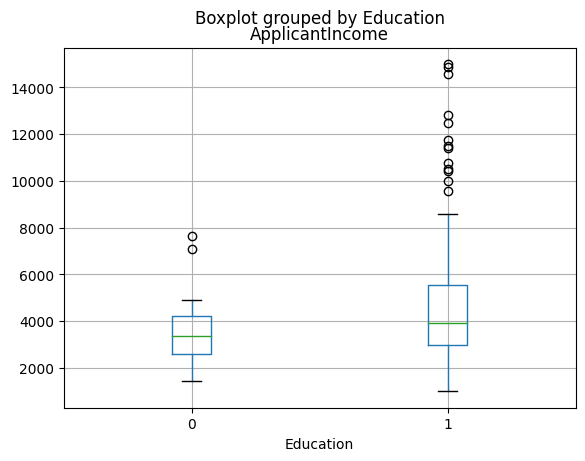

In [ ]:
loan_dataset.boxplot(column='ApplicantIncome', by='Education')

<Axes: >

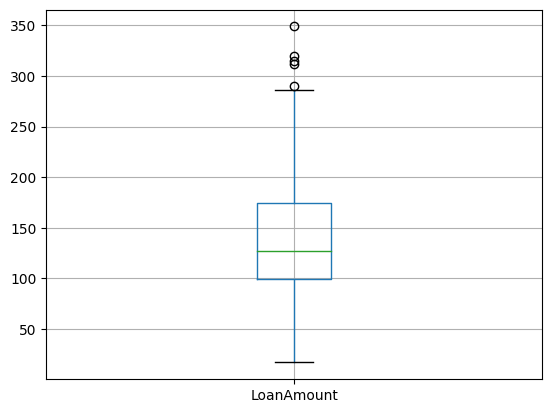

In [ ]:
loan_dataset.boxplot(column='LoanAmount')

<Axes: >

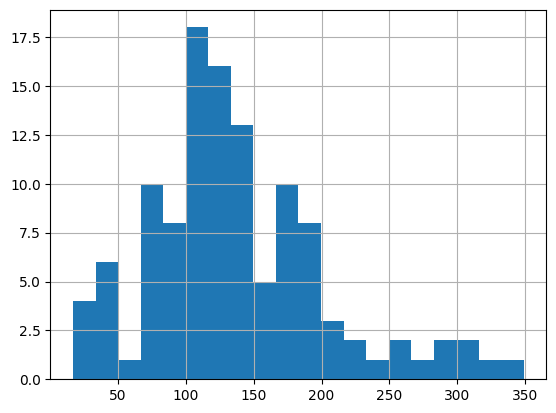

In [ ]:
loan_dataset['LoanAmount'].hist(bins=20)

In [ ]:
#number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender                2
Married               1
Dependents            3
Education             0
Self_Employed         9
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            9
Loan_Amount_Term      6
Credit_History       12
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode()[0],inplace=True)

In [ ]:
loan_dataset['Married'].fillna(loan_dataset['Married'].mode()[0],inplace=True)

In [ ]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [ ]:
#number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# lable encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [ ]:
# printing the first 10 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267.0,360.0,1.0,Urban,1


In [ ]:
# dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     70
2     22
1     14
3+     8
Name: count, dtype: int64

In [ ]:
# replacing the value or 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [ ]:
#dependent value
loan_dataset['Dependents'].value_counts()

Dependents
0    70
2    22
1    14
4     8
Name: count, dtype: int64

In [ ]:
loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode()[0],inplace = True)

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

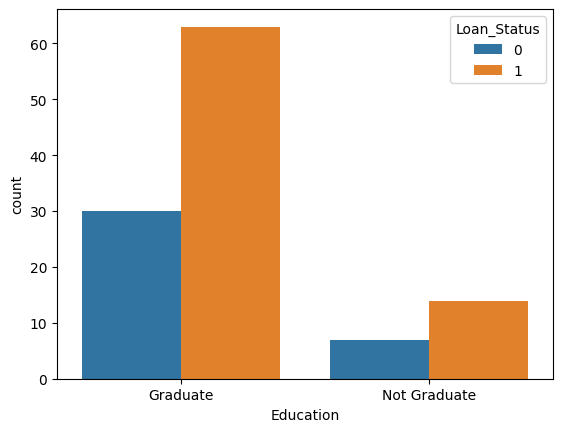

In [ ]:
# education and loan status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

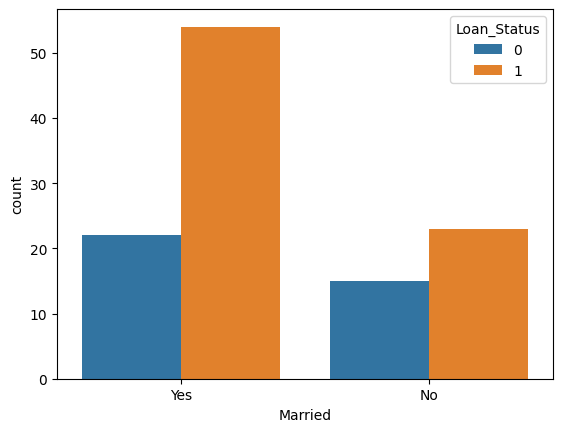

In [ ]:
# marital status and loan status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [ ]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},
                      'Self_Employed':{'No':0,'Yes':1}, 'Property_Area':{'Rural':0,
                      'Semiurban':1,'Urban':2},
                      'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196,267.0,360.0,1.0,2,1


In [ ]:
# seperating the data and label
x = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = loan_dataset['Loan_Status']

In [ ]:
print(x)
print(y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
5         1        1           2          1              1             5417   
..      ...      ...         ...        ...            ...              ...   
144       1        1           2          1              0            11757   
145       0        1           0          1              0             2330   
146       0        1           2          1              0            14866   
147       1        1           1          1              0             1538   
148       0        0           0          1              0            10000   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

Train Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,
                                                 stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(114, 11) (102, 11) (12, 11)


Training the Model:
Support Vector Machine Model


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support Vector Machine Model
classifier.fit(x_train,y_train)

SVC(kernel='linear')

Model Evaluation

In [ ]:
#accuracy score on training data
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [ ]:
print ('Accuracy on training data : ', training_data_accuracy)


Accuracy on training data :  0.7941176470588235


In [ ]:
#accuracy score on training data
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print ('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.75


Making a Predictive System

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
DecisionTreeClassifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = DecisionTreeClassifier.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])